important libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

#### 1. Data loading and inspection

In [2]:
heart_df =pd.read_csv(r"C:\Users\user\Desktop\Baacumen\machine learning\project\Heart failure\heart.csv")

In [3]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

##### Display the shape of the data set

In [5]:
# checking the shape of the dataset (rows, columns)
print("Shape of the dataset:", heart_df.shape)

Shape of the dataset: (918, 12)


##### Display the number of unique values in each column

In [6]:
print("\n Number of Unique Values in Each Column:\n", heart_df.nunique())


 Number of Unique Values in Each Column:
 Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


##### checking missing value

In [7]:
print("\n Null Values in Each Column:\n", heart_df.isnull().sum())


 Null Values in Each Column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### 2. Data Cleaning & Preprocessing

#####

##### creating catagorical features

In [8]:
heart_df["FastingBS"] = heart_df["FastingBS"].astype(object)

In [9]:
categorical_features = heart_df.select_dtypes(include='object')
categorical_features.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


##### Apply one hot encoder on classfication features

In [10]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohc = OneHotEncoder()
ohc.fit(categorical_features)

OneHotEncoder()

In [11]:
x_categorical = ohc.transform(categorical_features)
x_categorical.shape

(918, 16)

##### creating numerical features

In [12]:
numerical_features = heart_df.select_dtypes(exclude='object').drop(columns="HeartDisease")
numerical_features.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.00
1,49,160,180,156,1.00
2,37,130,283,98,0.00
3,48,138,214,108,1.50
4,54,150,195,122,0.00


##### scale numerical features

In [13]:
scaler = StandardScaler()
scaler.fit(numerical_features)

StandardScaler()

In [14]:
x_numerical = scaler.transform(numerical_features)

In [15]:
x = pd.concat([pd.DataFrame(x_categorical.toarray()),pd.DataFrame(x_numerical)],axis=1,ignore_index=True)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,-1.43,0.41,0.83,1.38,-0.83
1,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,-0.48,1.49,-0.17,0.75,0.11
2,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,-1.75,-0.13,0.77,-1.53,-0.83
3,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.00,-0.58,0.30,0.14,-1.13,0.57
4,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,1.00,0.00,0.00,0.00,1.00,0.05,0.95,-0.03,-0.58,-0.83


##### check class imbalance

In [16]:
heart_df["HeartDisease"].value_counts(normalize=True)*100

HeartDisease
1   55.34
0   44.66
Name: proportion, dtype: float64

##### Split the data

In [17]:
y = heart_df["HeartDisease"]

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=77)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734, 21), (184, 21), (734,), (184,))

## 3. EDA

##### univariate plot

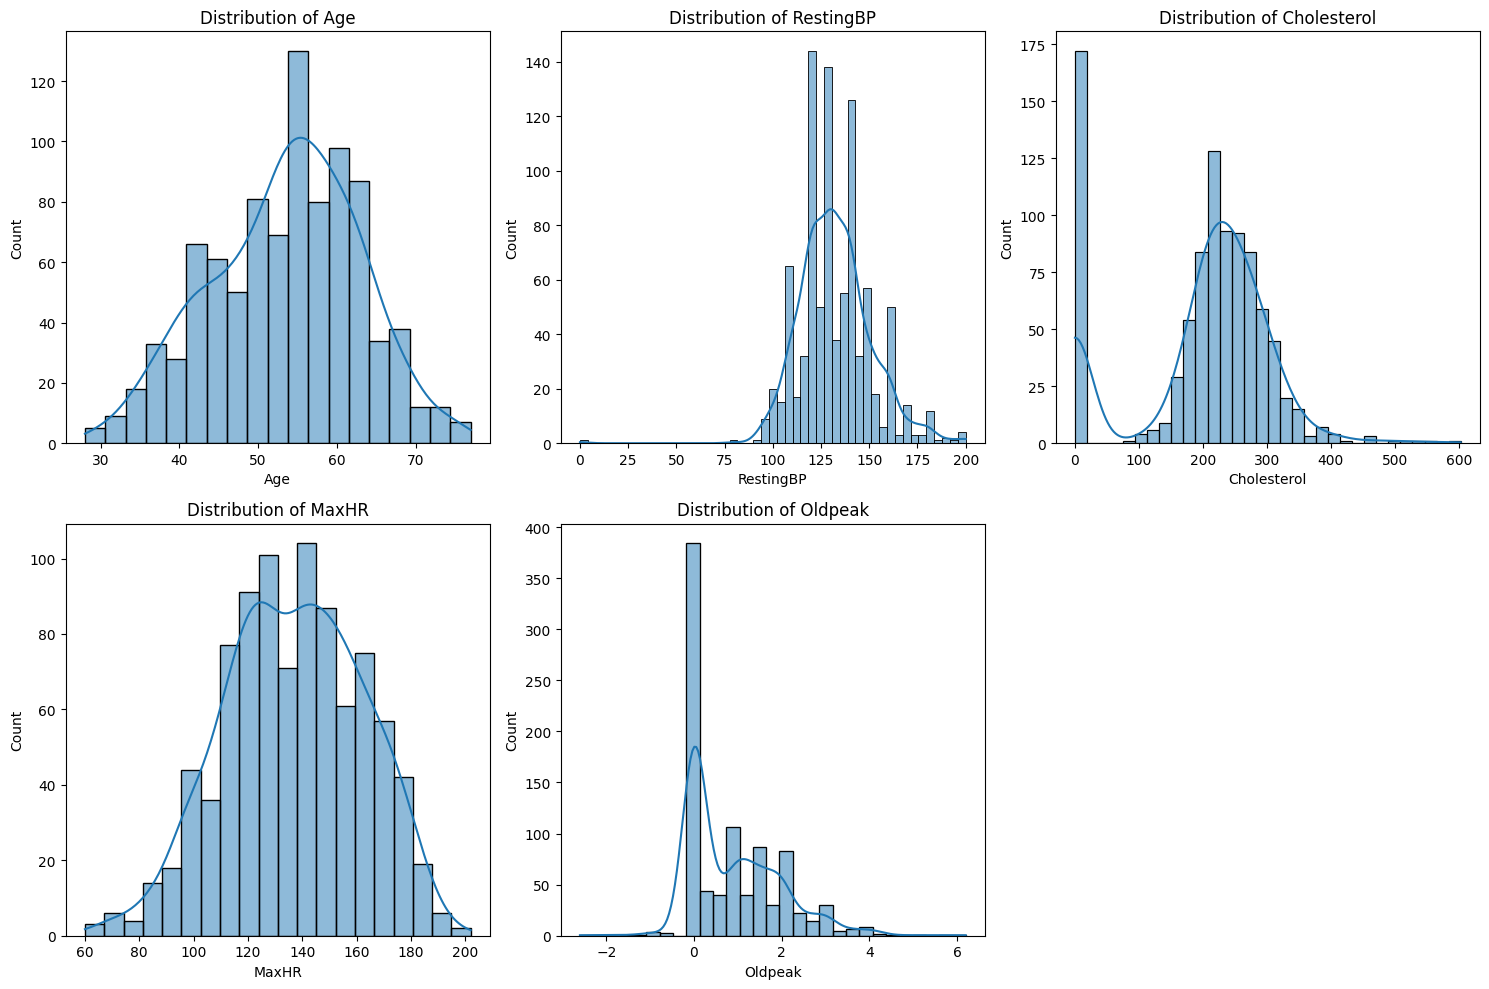

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(numerical_features[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

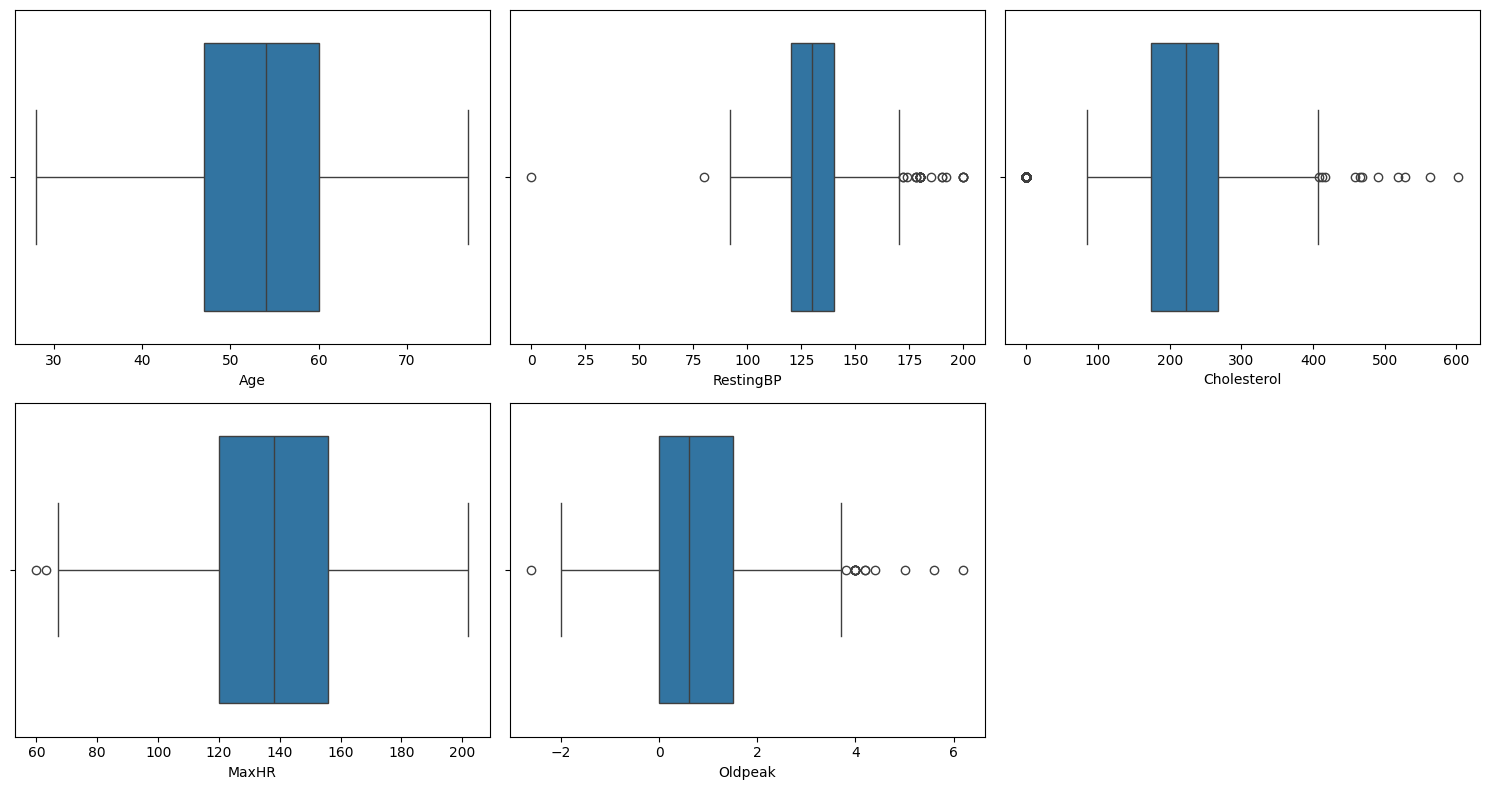

In [20]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(list(numerical_features.columns)[0:]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=numerical_features, x=col)
plt.tight_layout()
plt.show()

### Bivariate plot

##### Distribution of categorical features by heart disease

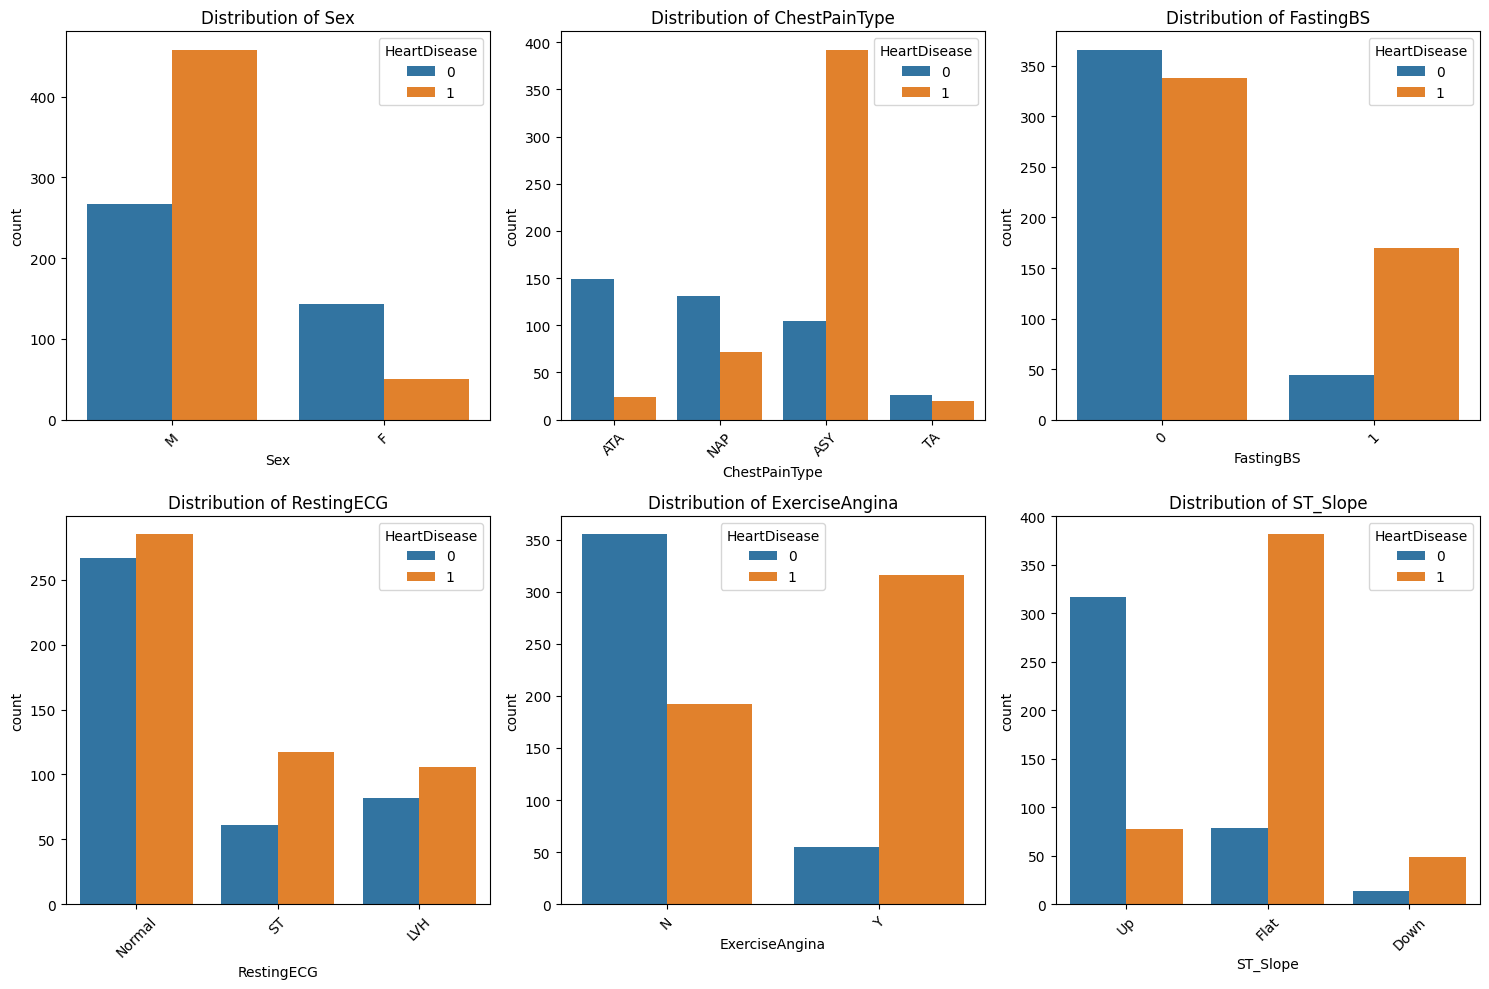

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(list(categorical_features.columns)[0:]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = heart_df, x= col, hue='HeartDisease')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

### Removing outliers

In [22]:
numerical_features = heart_df.select_dtypes(exclude='object').drop(columns="HeartDisease")

In [23]:
Q1 = numerical_features['RestingBP'].quantile(0.25)
Q3 = numerical_features['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical_features['RestingBP'] = np.where(numerical_features['RestingBP'] < lower_bound, lower_bound,
                   np.where(numerical_features['RestingBP'] > upper_bound, upper_bound, numerical_features['RestingBP']))

In [24]:
Q1 = numerical_features['Oldpeak'].quantile(0.25)
Q3 = numerical_features['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical_features['Oldpeak'] = np.where(numerical_features['Oldpeak'] < lower_bound, lower_bound,
                   np.where(numerical_features['Oldpeak'] > upper_bound, upper_bound, numerical_features['Oldpeak']))

In [25]:
Q1 = numerical_features['Cholesterol'].quantile(0.25)
Q3 = numerical_features['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical_features['Cholesterol'] = np.where(numerical_features['Cholesterol'] < lower_bound, lower_bound,
                   np.where(numerical_features['Cholesterol'] > upper_bound, upper_bound, numerical_features['Cholesterol']))

In [26]:
Q1 = numerical_features['MaxHR'].quantile(0.25)
Q3 = numerical_features['MaxHR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical_features['MaxHR'] = np.where(numerical_features['MaxHR'] < lower_bound, lower_bound,
                   np.where(numerical_features['MaxHR'] > upper_bound, upper_bound, numerical_features['MaxHR']))

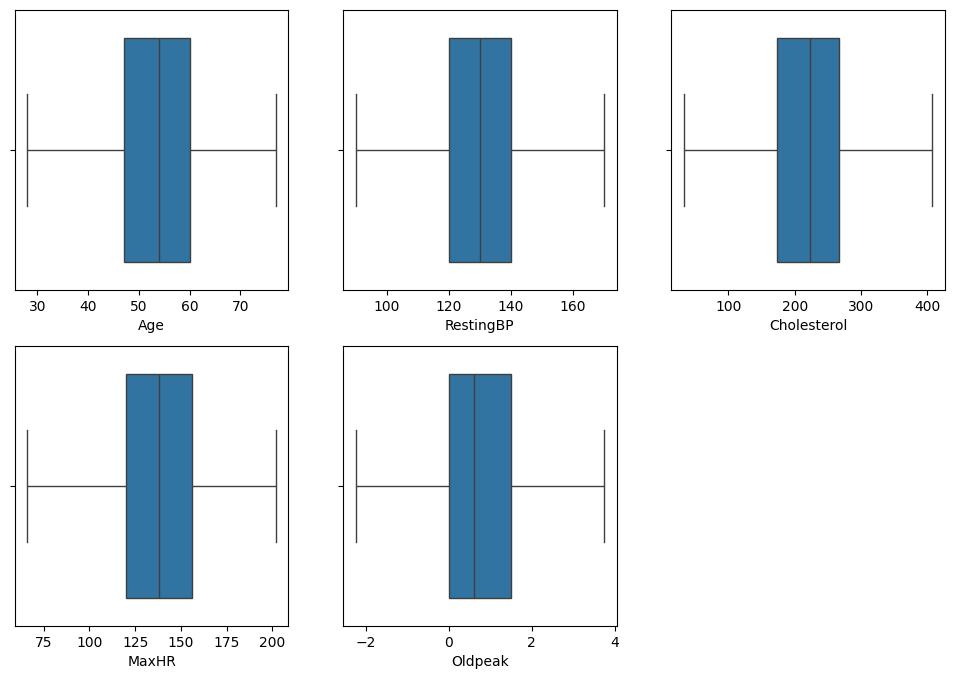

In [27]:
plt.figure(figsize=(12,8))
for i,col in enumerate(list(numerical_features.columns)[0:]):
    plt.subplot(2,3,i+1)
    sns.boxplot(numerical_features,x=col)
plt.show()

#### Heatmap

In [28]:
numerical_features = heart_df.select_dtypes(exclude='object')

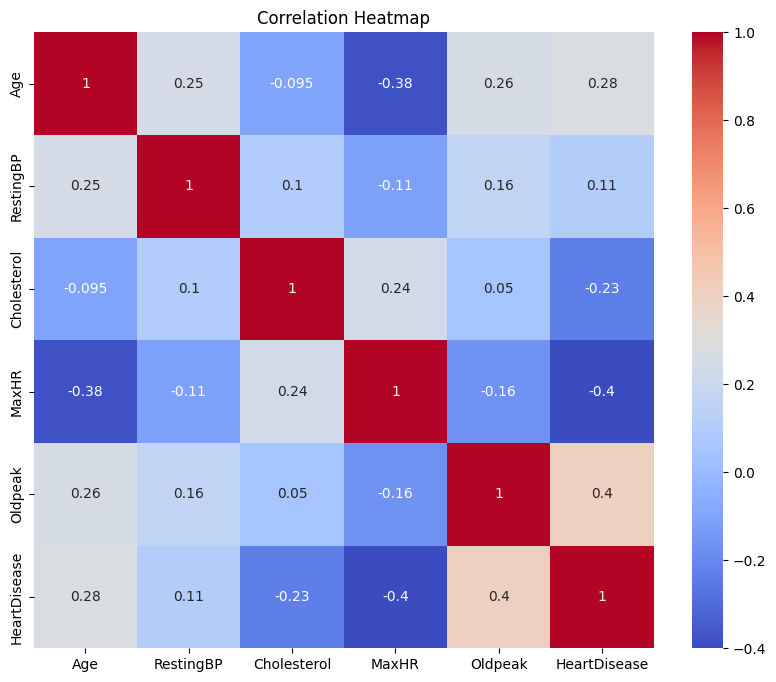

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 4. Statistical Testing 

#### Chisquare test

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency, ttest_ind

In [31]:
chi2_results = []
for col in categorical_features:
    table = pd.crosstab(heart_df[col], heart_df['HeartDisease'])
    stat, p, dof, expected = chi2_contingency(table)
    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': stat,
        'Degrees of Freedom': dof,
        'p-value': f"{p:.4f}",
        'Significant (p<0.05)': 'Yes' if p < 0.05 else 'No'
    })

chi2_df = pd.DataFrame(chi2_results)
print("\nChi-square Test Summary:")
print(chi2_df)



Chi-square Test Summary:
          Feature  Chi2 Statistic  Degrees of Freedom p-value  \
0             Sex           84.15                   1  0.0000   
1   ChestPainType          268.07                   3  0.0000   
2       FastingBS           64.32                   1  0.0000   
3      RestingECG           10.93                   2  0.0042   
4  ExerciseAngina          222.26                   1  0.0000   
5        ST_Slope          355.92                   2  0.0000   

  Significant (p<0.05)  
0                  Yes  
1                  Yes  
2                  Yes  
3                  Yes  
4                  Yes  
5                  Yes  


### T test

In [34]:
numerical_features=numerical_features.drop(columns='HeartDisease')

In [35]:
from scipy.stats import ttest_ind

group0 = heart_df[heart_df['HeartDisease'] == 0]
group1 = heart_df[heart_df['HeartDisease'] == 1]



t_test_results = []

for col in numerical_features:
    t_stat, p_val = ttest_ind(group0[col], group1[col], equal_var=False) 
    t_test_results.append({'Feature': col, 'T-statistic': t_stat, 'p-value': f"{p:.4f}"})

t_test_df = pd.DataFrame(t_test_results)
t_test_df.sort_values('p-value', inplace=True)
print(t_test_df)

       Feature  T-statistic p-value
0          Age        -8.82  0.0000
1    RestingBP        -3.34  0.0000
2  Cholesterol         7.63  0.0000
3        MaxHR        13.23  0.0000
4      Oldpeak       -14.04  0.0000


#### The significat chisquare and t-test shows that all the categorical and numerical features are important for predicting heart disease.

# Model development

### 1.Logistics regression

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=77)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734, 21), (184, 21), (734,), (184,))

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=7)
lr.fit(x_train,y_train)

LogisticRegression(random_state=7)

In [38]:
lr.coef_

array([[-0.64943415,  0.60571623,  1.13250621, -0.56417919, -0.3674804 ,
        -0.24456453, -0.57369087,  0.52997296,  0.10982079, -0.14084342,
        -0.01269528, -0.5088818 ,  0.46516388, -0.14453944,  1.1210891 ,
        -1.02026757,  0.09097083,  0.20599316, -0.49569358, -0.07446808,
         0.39819892]])

In [39]:
lr.intercept_

array([-0.04950898])

In [41]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

y_predictions = lr.predict(x_test)
confusion_matrix(y_test,y_predictions)

array([[71,  9],
       [12, 92]])

In [43]:
results_lr = pd.DataFrame()
results_lr["Actual_y_values"] = y_test
results_lr["Predicted_y_values"] = y_predictions
results_lr.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,1


In [ ]:
results_lr.replace({0:"false",1:"true"},inplace=True)
results_lr.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,true


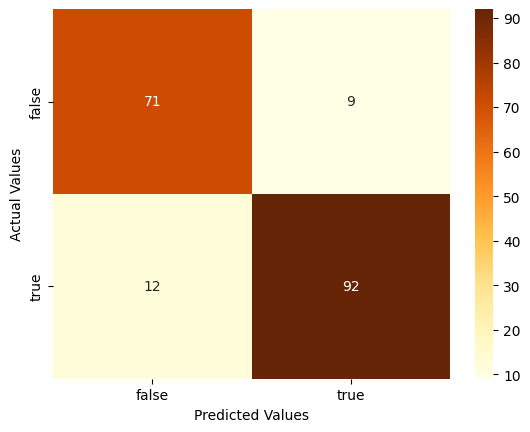

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_lr["Actual_y_values"],results_lr["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [53]:
print(classification_report(results_lr["Actual_y_values"],results_lr["Predicted_y_values"]))

              precision    recall  f1-score   support

       false       0.86      0.89      0.87        80
        true       0.91      0.88      0.90       104

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



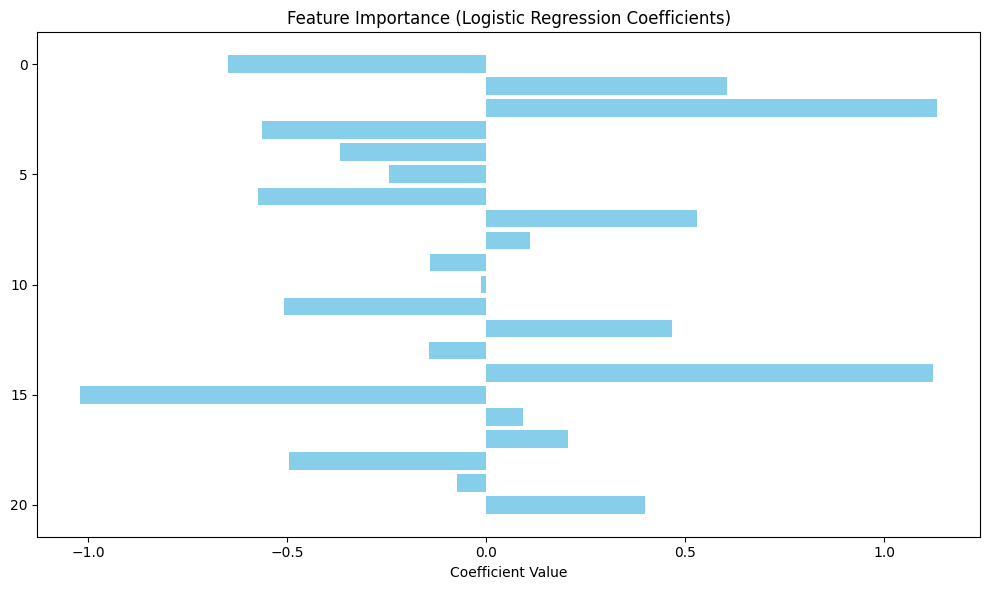

    Feature  Importance
2         2        1.13
14       14        1.12
15       15       -1.02
0         0       -0.65
1         1        0.61
6         6       -0.57
3         3       -0.56
7         7        0.53
11       11       -0.51
18       18       -0.50
12       12        0.47
20       20        0.40
4         4       -0.37
5         5       -0.24
17       17        0.21
13       13       -0.14
9         9       -0.14
8         8        0.11
16       16        0.09
19       19       -0.07
10       10       -0.01


In [58]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': lr.coef_[0]
})

# Sort by absolute importance
feature_importance['AbsImportance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='AbsImportance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display table
print(feature_importance[['Feature', 'Importance']])


### ? to do  Bars in order and features name
               

### 2. Decision tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=7)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=7)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

y_predictions = dt.predict(x_test)
confusion_matrix(y_test,y_predictions)

array([[68, 12],
       [24, 80]])

In [67]:
results_dt = pd.DataFrame()
results_dt["Actual_y_values"] = y_test
results_dt["Predicted_y_values"] = y_predictions
results_dt.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,0


In [68]:
results_dt.replace({0:"false",1:"true"},inplace=True)
results_dt.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,false


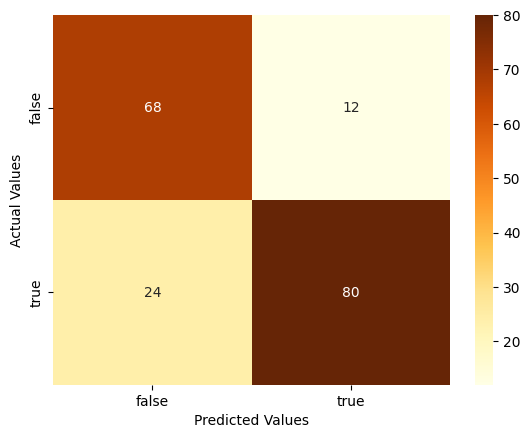

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_dt["Actual_y_values"],results_dt["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [70]:
print(classification_report(results_dt["Actual_y_values"],results_dt["Predicted_y_values"]))

              precision    recall  f1-score   support

       false       0.74      0.85      0.79        80
        true       0.87      0.77      0.82       104

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



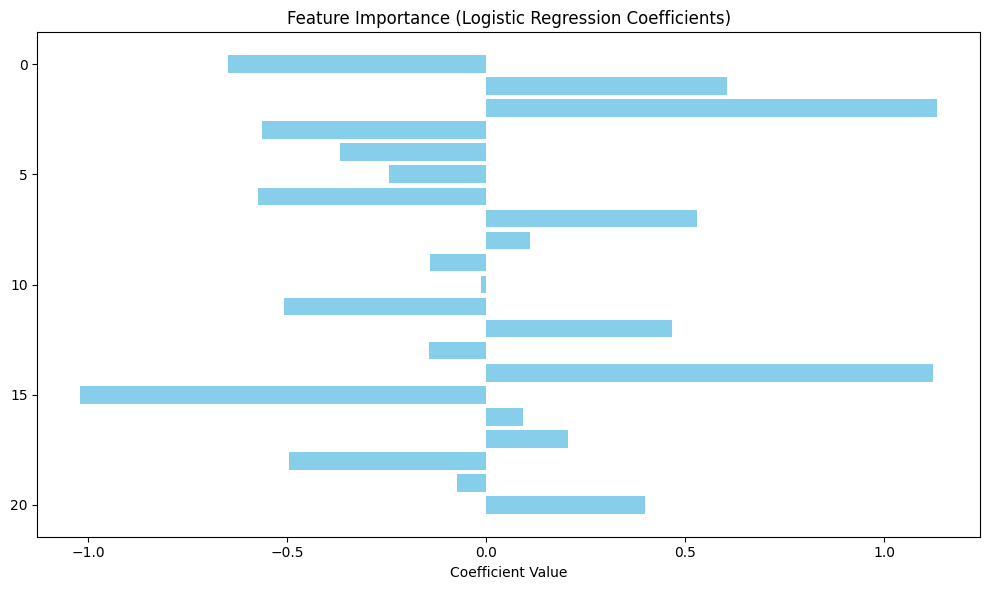

    Feature  Importance
2         2        1.13
14       14        1.12
15       15       -1.02
0         0       -0.65
1         1        0.61
6         6       -0.57
3         3       -0.56
7         7        0.53
11       11       -0.51
18       18       -0.50
12       12        0.47
20       20        0.40
4         4       -0.37
5         5       -0.24
17       17        0.21
13       13       -0.14
9         9       -0.14
8         8        0.11
16       16        0.09
19       19       -0.07
10       10       -0.01


In [71]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': lr.coef_[0]
})

# Sort by absolute importance
feature_importance['AbsImportance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='AbsImportance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Display table
print(feature_importance[['Feature', 'Importance']])

### 3. Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,   
    max_depth=10,        
    min_samples_split=5, # Optional: Prevents overfitting
    random_state=27
)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=27)

In [73]:
y_pred = rf.predict(x_test)

In [74]:
results_rf = pd.DataFrame()
results_rf["Actual_y_values"] = y_test
results_rf["Predicted_y_values"] = y_pred

In [77]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

y_predictions = rf.predict(x_test)
confusion_matrix(y_test,y_predictions)

array([[70, 10],
       [ 7, 97]])

In [80]:
results_rf = pd.DataFrame()
results_rf["Actual_y_values"] = y_test
results_rf["Predicted_y_values"] = y_predictions
results_rf.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,1


In [81]:
results_rf.replace({0:"false",1:"true"},inplace=True)
results_rf.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,true


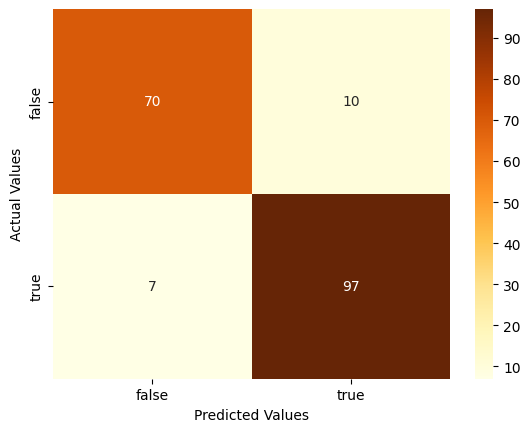

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_rf["Actual_y_values"],results_rf["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [83]:
print(classification_report(results_rf["Actual_y_values"],results_rf["Predicted_y_values"]))

              precision    recall  f1-score   support

       false       0.91      0.88      0.89        80
        true       0.91      0.93      0.92       104

    accuracy                           0.91       184
   macro avg       0.91      0.90      0.91       184
weighted avg       0.91      0.91      0.91       184



### 4. SVM

In [89]:
svm = SVC(random_state=42)
svm.fit(x_train, y_train)

SVC(random_state=42)

In [90]:
y_pred = svm_classifier.predict(x_test)

In [91]:
results_svm = pd.DataFrame()
results_svm["Actual_y_values"] = y_test
results_svm["Predicted_y_values"] = y_pred

In [92]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

y_predictions = svm.predict(x_test)
confusion_matrix(y_test,y_predictions)

array([[71,  9],
       [ 8, 96]])

In [93]:
results_svm = pd.DataFrame()
results_svm["Actual_y_values"] = y_test
results_svm["Predicted_y_values"] = y_predictions
results_svm.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,1


In [94]:
results_svm.replace({0:"false",1:"true"},inplace=True)
results_svm.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,true


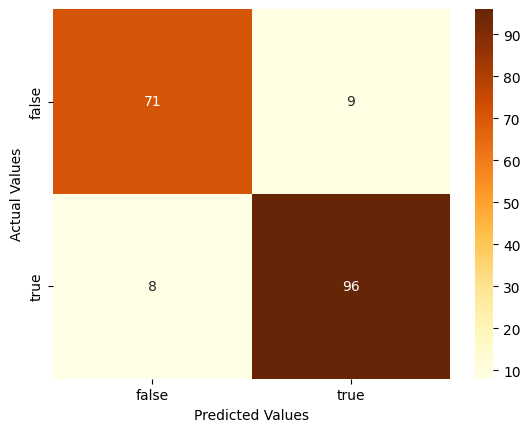

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_svm["Actual_y_values"],results_svm["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [96]:
print(classification_report(results_svm["Actual_y_values"],results_svm["Predicted_y_values"]))

              precision    recall  f1-score   support

       false       0.90      0.89      0.89        80
        true       0.91      0.92      0.92       104

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



#### hyper parametric tuning

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
]

svm = SVC(random_state=47)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.8664989283384585


In [87]:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=7)

svm_classifier.fit(x_train, y_train)

SVC(gamma=0.1, random_state=7)

In [88]:
y_pred = svm_classifier.predict(x_test)

### 5. KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn_clf.predict(x_test)

In [99]:
results_knn = pd.DataFrame()
results_knn["Actual_y_values"] = y_test
results_knn["Predicted_y_values"] = y_pred

In [100]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

y_predictions = knn_clf.predict(x_test)
confusion_matrix(y_test,y_predictions)

array([[70, 10],
       [12, 92]])

In [101]:
results_knn = pd.DataFrame()
results_knn["Actual_y_values"] = y_test
results_knn["Predicted_y_values"] = y_predictions
results_knn.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,1


In [102]:
results_knn.replace({0:"false",1:"true"},inplace=True)
results_knn.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,true


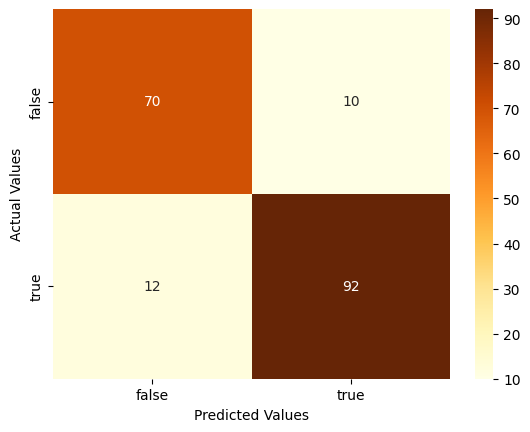

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_knn["Actual_y_values"],results_knn["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [104]:
print(classification_report(results_knn["Actual_y_values"],results_knn["Predicted_y_values"]))

              precision    recall  f1-score   support

       false       0.85      0.88      0.86        80
        true       0.90      0.88      0.89       104

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



### 6. KGBoost

In [105]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical (0 and 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state = 57)
model.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [114]:
y_pred_encoded = model.predict(x_test)
y_pred_labels = label_encoder.inverse_transform(y_pred_encoded)

In [115]:
results_xgb = pd.DataFrame()
results_xgb["Actual_y_values"] = y_test
results_xgb["Predicted_y_values"] = y_pred

In [116]:
results_xgb = pd.DataFrame()
results_xgb["Actual_y_values"] = y_test
results_xgb["Predicted_y_values"] = y_predictions
results_xgb.head()

,Actual_y_values,Predicted_y_values
620,0,0
489,1,1
220,1,1
228,0,0
264,1,1


In [117]:
results_xgb.replace({0:"false",1:"true"},inplace=True)
results_xgb.head()

,Actual_y_values,Predicted_y_values
620,false,false
489,true,true
220,true,true
228,false,false
264,true,true


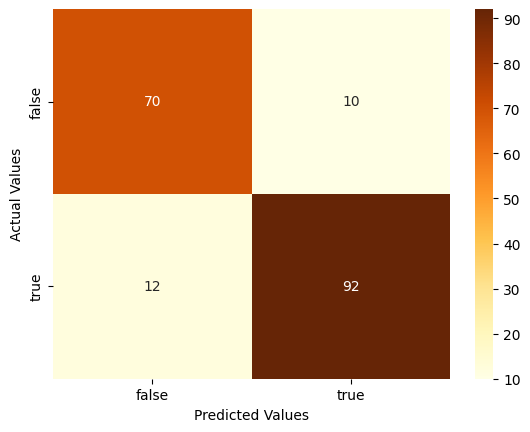

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(results_xgb["Actual_y_values"],results_xgb["Predicted_y_values"],labels=["false","true"]),annot=True,cmap="YlOrBr",xticklabels=["false","true"],yticklabels=["false","true"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [113]:
# 3. Predict on test data
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Encode y_test the same way as y_train

# Make predictions
y_pred = model.predict(x_test)
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

Confusion Matrix:
[[72  8]
 [10 94]]
